# レポート課題

In [16]:
import numpy as np
import networkx as nx

%matplotlib inline

In [17]:
DRAW_CONFIG = {
    'node_color': 'white',
    'edgecolors': 'black', # line color of nodes
    'with_labels': True,
    'node_size': 600,
    'font_size': 14,
    'font_family': 'Arial',
    'arrowsize': 15,
}

---

## ノードの媒介中心性（20点）

以下は，あるソーシャルネットワークグラフ$G_{social}$である．
グラフ$G_{social}$中におけるノードA，B，およびCの媒介中心性を計算過程を示しながら求めなさい．
なお，本課題のノード$n$の媒介中心性の計算において，ノードから別ノードへの最短経路が$n$を経由するもの以外にも存在する場合，$n$を経由する最短経路のみを計算対象としなさい．

/Users/yamamoto/.anyenv/envs/pyenv/versions/3.10.13/lib/python3.10/site-packages/networkx/drawing/nx_pylab.py:315: UserWarning: 

The arrowsize keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default values.
Note that using FancyArrowPatches may be slow for large graphs.

  draw_networkx_edges(G, pos, arrows=arrows, **edge_kwds)


[('B', 0.21428571428571427),
 ('C', 0.21428571428571427),
 ('D', 0.21428571428571427),
 ('E', 0.21428571428571427),
 ('G', 0.21428571428571427),
 ('H', 0.21428571428571427),
 ('A', 0.0),
 ('F', 0.0),
 ('I', 0.0)]

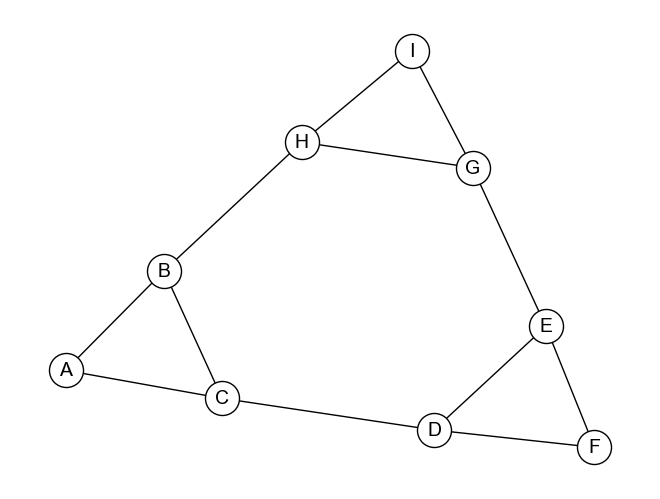

In [18]:
G_social = nx.Graph()
G_social.add_nodes_from(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I'])
G_social.add_edges_from([
    ('A', 'B'), ('A', 'C'),
    ('B', 'C'), ('B', 'H'),
    ('C', 'D'),
    ('H', 'I'), ('H', 'G'),
    ('I', 'G'), ('G', 'E'), ('D', 'E'), ('D', 'F'), ('E', 'F')
])

pos = nx.spring_layout(G_social, seed=1)
nx.draw(G_social, pos, **DRAW_CONFIG)

sorted(nx.betweenness_centrality(G_social).items(), key=lambda x: -x[1])[:20]

## PageRank（合計40点）
### シンプルなPageRank（20点）

以下のグラフ上の各ノードの重要度を以下の手順（単純なPageRankアルゴリズム）で計算したい．
1. 各ノードの重要度を$\frac{1}{N}$で初期化
2. ノード$x$の重要度$p(x)$を$p(x)=\sum_{y \in link\_to(x)} \frac{1}{deg_{out(y)}}p(y)$
3. ステップ2をスコアが収束するまで繰り返す

ただし，$N$はノード数，$link\_to(x)$はノード$x$にエッジを張っているノード集合，$deg_{out(y)}$はノード$y$の出次数とする．

ステップ2を3回繰り返したときの各ノードの重要度の値を計算しなさい．
また，ステップ2を3回繰り返した際の値の変化傾向から，ステップ2を無限に繰り返した際に得られるノードの重要度の収束値を予想しなさい．
なお，計算を手計算で行う場合はその過程を，プログラミングで行い場合はコードを解答とともに示しなさい．

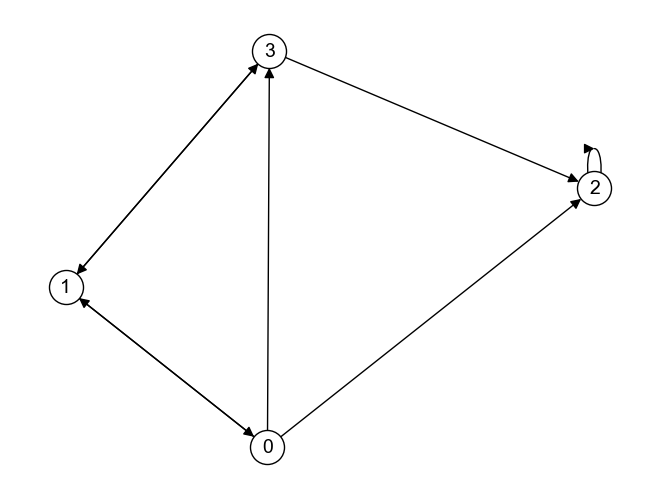

In [19]:
G = nx.DiGraph([
    (0, 1), (0, 2), (0, 3), 
    (1, 0), (1, 3),
    (2, 2),
    (3, 1), (3, 2)
])

pos = nx.spring_layout(G, seed=777)
nx.draw(G, pos, **DRAW_CONFIG)

### PageRankの解釈（20点）

グラフ$G$に含まれるノード数を$N$，ノード$x$にエッジを張っているノード集合を$link\_to(x)$，ノード$y$の出次数を$deg_{out(y)}$，$\alpha$を0以上1以下の実数とするとき，$G$に含まれるノード$x$のPageRank値$p(x)$は，以下の式によって再帰的に計算される．

$$
p(x) = \alpha (\sum_{y \in link\_to(x)} \frac{1}{deg_{out(y)}p(y)}) + (1 - \alpha)\frac{1}{N}
$$

グラフ$G$の各ノードのPageRank値を上の式に従って計算したとき，どのノードのPageRank値も少なくとも$\frac{1-\alpha}{N}$になることを示しなさい．
また，$\alpha$が0に近づくにつれて，各ノードのPageRank値の違いにどのような意味合いを持つのか述べなさい．

## 社会ネットワーク分析（合計40点）

以下のグラフ$G_{edo}$は，[人文学オープンデータ共同利用センター](https://codh.rois.ac.jp/)が公開しているデータベース[江戸買物案内](https://codh.rois.ac.jp/edo-shops/iiif-curation-finder/?lang=ja)をもとに，「[江戸買物独案内](https://ja.wikipedia.org/wiki/%E6%B1%9F%E6%88%B8%E8%B2%B7%E7%89%A9%E7%8B%AC%E6%A1%88%E5%86%85)」で登場する商人の交流関係の一部をグラフ化したものである（データベースからの対象データ抽出は山本が実施）．
グラフ中のノードは江戸買物案内に2回以上登場する商人，エッジは同じ区域（居所（歴史地名大系））で商売を営んでいたことを意味する．

グラフ$G_{edo}$のデータは，[コチラ](https://www.dropbox.com/scl/fi/cd6dwk02cvlet0b5vqb09/edo_merchant.graphml?rlkey=64337j18i6pct3ks6x8oet8x3&st=7unpynho&dl=1)からダウンロードが可能である（パスワードは講義中に伝えます）．
また，ダウンロードしたデータは，以下のコードでNetworkX形式のグラフとして読み込める（データは`data/edo_merchant`ディレクトリに`edo_merchant.graphml`という名前で保存したとする）．

In [20]:
G_edo = nx.read_graphml(path="data/edo_merchant/edo_merchant.graphml")

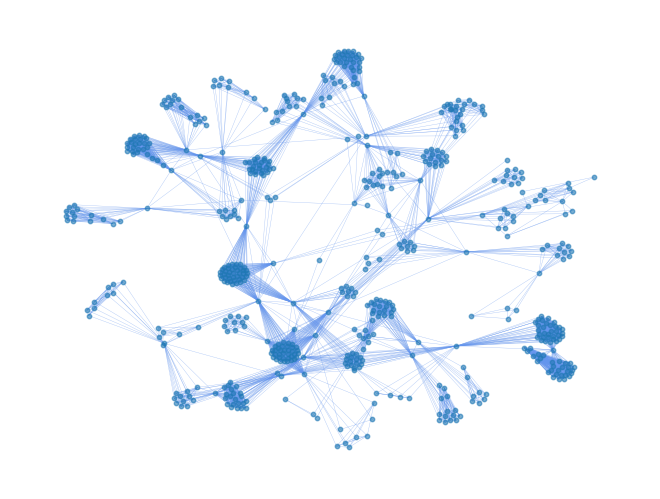

In [21]:
G_edo = nx.read_graphml(path="data/edo_merchant/edo_merchant.graphml")

EDO_DRAW_CONFIG = {
    'node_size': 10,
    'with_labels': False,    
    'edge_color': 'cornflowerblue',
    'width': 0.25,
    'alpha': 0.6,
}

pos = nx.spring_layout(G_edo, iterations=150, seed=1234, k=0.5)
nx.draw(G_edo, pos, **EDO_DRAW_CONFIG)

### 影響力のある商人（15点）

グラフ$G_{edo}$をもとに，データ中に含まれる商人のうち，最も影響力のあった商人の上位10名を求めなさい．
解答においては，上位10名を求める過程や検討の際に用いたプログラミングコードも合わせて提示すること．
なお，「影響力」の定義は解答者が定めればよいが，その定義を必ず解答の中で宣言すること．


### 商売区域をつなぐ重要な商人（15点）

可視化されたグラフが示しているように，グラフ$G_{edo}$においてノード（商人）は商売区域ごとにコミュニティを形成しているように見える．
現代においてもそうであるように，ある地域から新たな地域，しかも大きな区域に出店をする際には，商売区域をつなぐような人物は重宝されたと考えられる．

グラフ$G_{edo}$をもとに，データ中に含まれる商人のうち，コミュニティの橋渡し役として重要であったと考えられる商人の上位10名を求めなさい．
解答においては，上位10名を求める過程や検討の際に用いたプログラミングコードも合わせて提示すること．
なお，「橋渡し役としての重要度」の定義は解答者が定めればよいが，その定義を必ず解答の中で宣言すること．


### 商売区域をつなぐ重要な商人（10点・やや難）

[コチラ]()からダウンロードできるデータには，グラフ$G_{edo}$に含まれる商人のうち，「鰹節・塩干肴問屋」を営んでいた商人の名前が収められている．
グラフ$G_{edo}$をもとに，「鰹節・塩干肴問屋」を営む商人の界隈で影響力のあった商人の上位5名を求めなさい．
解答においては，上位5名を求める過程や検討の際に用いたプログラミングコードも合わせて提示すること．
なお，「影響力」の定義は解答者が定めればよいが，その定義を必ず解答の中で宣言すること．